In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

# Import Data

In [3]:
df = pd.read_excel('Air_BNB.xlsx')

In [4]:
df.drop('id',axis=1,inplace= True)

In [5]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [6]:
df.shape

(74111, 10)

In [8]:
round(df.describe(include="all"),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107.0,NaN,NaN,NaN,0.73,0.44,0.0,0.0,1.0,1.0,1.0
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


# Null Value Treatment 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74111 non-null  object 
 2   bathrooms             74111 non-null  object 
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74111 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  74111 non-null  object 
 7   bedrooms              74111 non-null  object 
 8   beds                  74111 non-null  object 
 9   log_price             74111 non-null  float64
dtypes: float64(1), object(9)
memory usage: 5.7+ MB


In [10]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [12]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [13]:
print("Room Type ", df['room_type'].nunique())

Room Type  3


In [14]:
print(df['room_type'].value_counts())

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64


In [18]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column, ':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()
    

room_type : 3

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

cancellation_policy : 3

strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

instant_bookable : 3

f    54660
t    19451
Name: instant_bookable, dtype: int64



In [19]:
df_2 = df.copy()

In [22]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [25]:
df_2.drop_duplicates(inplace = True)

In [26]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [28]:
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [30]:
df_2.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [31]:
df_2 = pd.get_dummies(df_2, columns = ['room_type','cancellation_policy', 'instant_bookable'], drop_first = True)

In [32]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,0,0,0,1,1


In [35]:
for column in df_2.columns:
    if df_2[column].dtype != 'Object':
        mean = df_2[column].mean()
        df_2[column] = df_2[column].fillna(mean)

In [37]:
df_2.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [38]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [39]:
df_mean = df_2

In [40]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [41]:
df_med = df_2.copy()

In [42]:
df_med

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [47]:
for column in df_med.columns:
    if df_med[column].dtype != 'Object':
        median = df_med[column].median
        df_med[column] = df_med[column].fillna(median)

In [48]:
df_med.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [49]:
df_knn = df_2.copy()

In [50]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [59]:
from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression

In [60]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_2)
df_knn = pd.DataFrame(data = df_imputed, columns = df_2.columns)

In [61]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54113,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54114,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54115,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


# Outlier Treatment

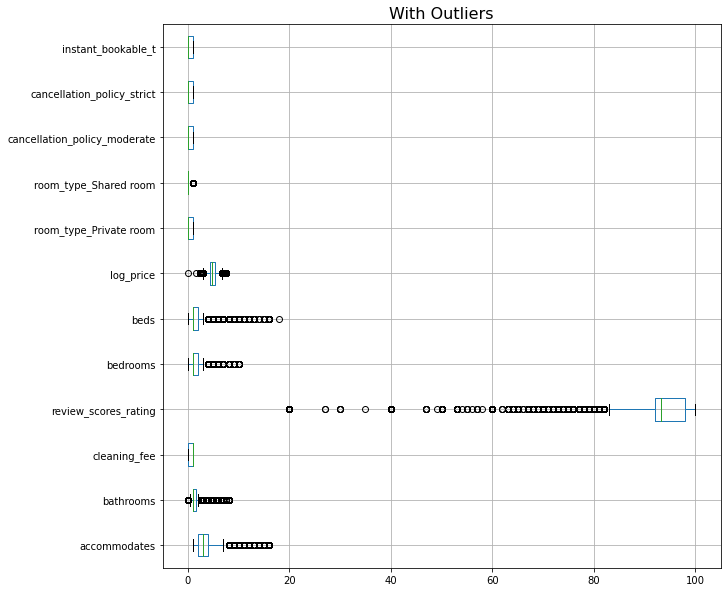

In [64]:
cont = df_knn.dtypes[(df_knn.dtypes!='uint8') & (df_knn.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers', fontsize = 16)
plt.show()

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [68]:
remove_outlier(df_mean['review_scores_rating']) 

(83.0, 107.0)

In [90]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

In [92]:
df_mean_out

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [95]:
for column in df_mean_out.columns:
    lr,ur = remove_outlier(df_mean_out[column])
    df_mean_out[column] = np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    df_mean_out[column] = np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

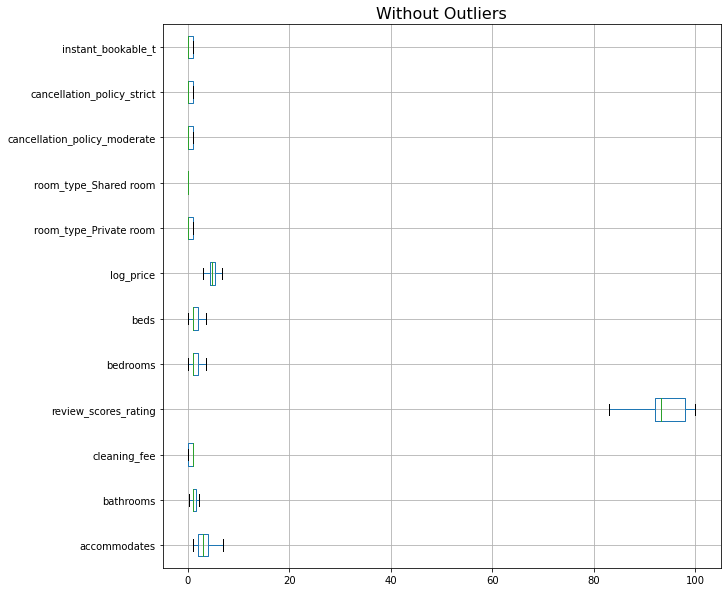

In [97]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize = 16)
plt.show()

In [133]:
for column in df_med_out.columns:
    lr,ur = remove_outlier(df_med_out[column])
    df_med_out[column] = np.where(df_med_out[column]>ur,ur,df_med_out[column])
    df_med_out[column] = np.where(df_med_out[column]<lr,lr,df_med_out[column])

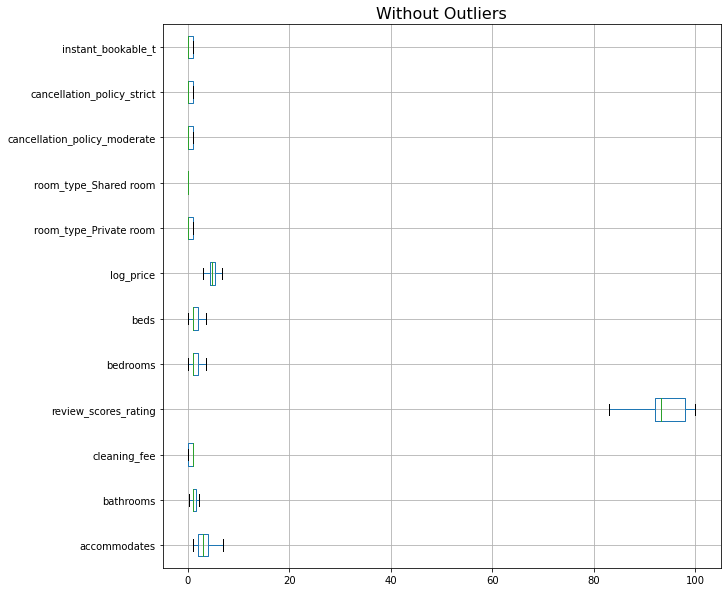

In [134]:
plt.figure(figsize=(10,10))
df_med_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize = 16)
plt.show()

In [137]:
for column in df_knn_out.columns:
    lr,ur = remove_outlier(df_knn_out[column])
    df_knn_out[column] = np.where(df_knn_out[column]>ur,ur,df_knn_out[column])
    df_knn_out[column] = np.where(df_knn_out[column]<lr,lr,df_knn_out[column])

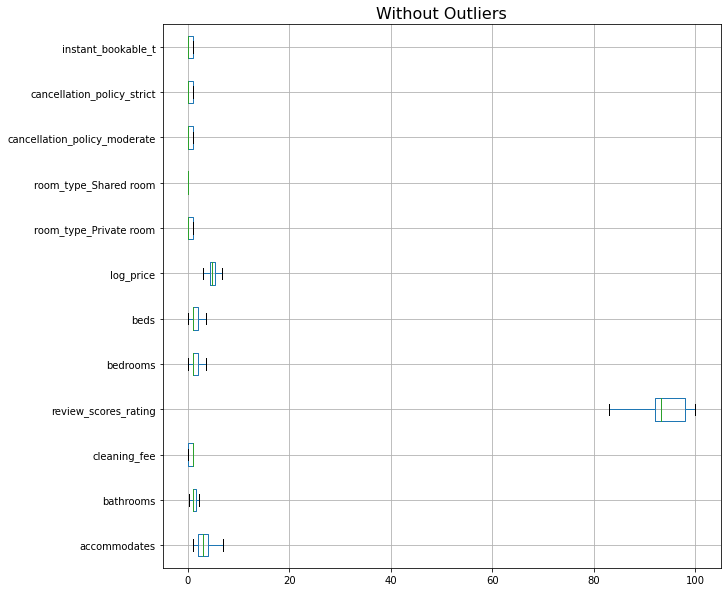

In [138]:
plt.figure(figsize=(10,10))
df_knn_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize = 16)
plt.show()

# Data Distribution

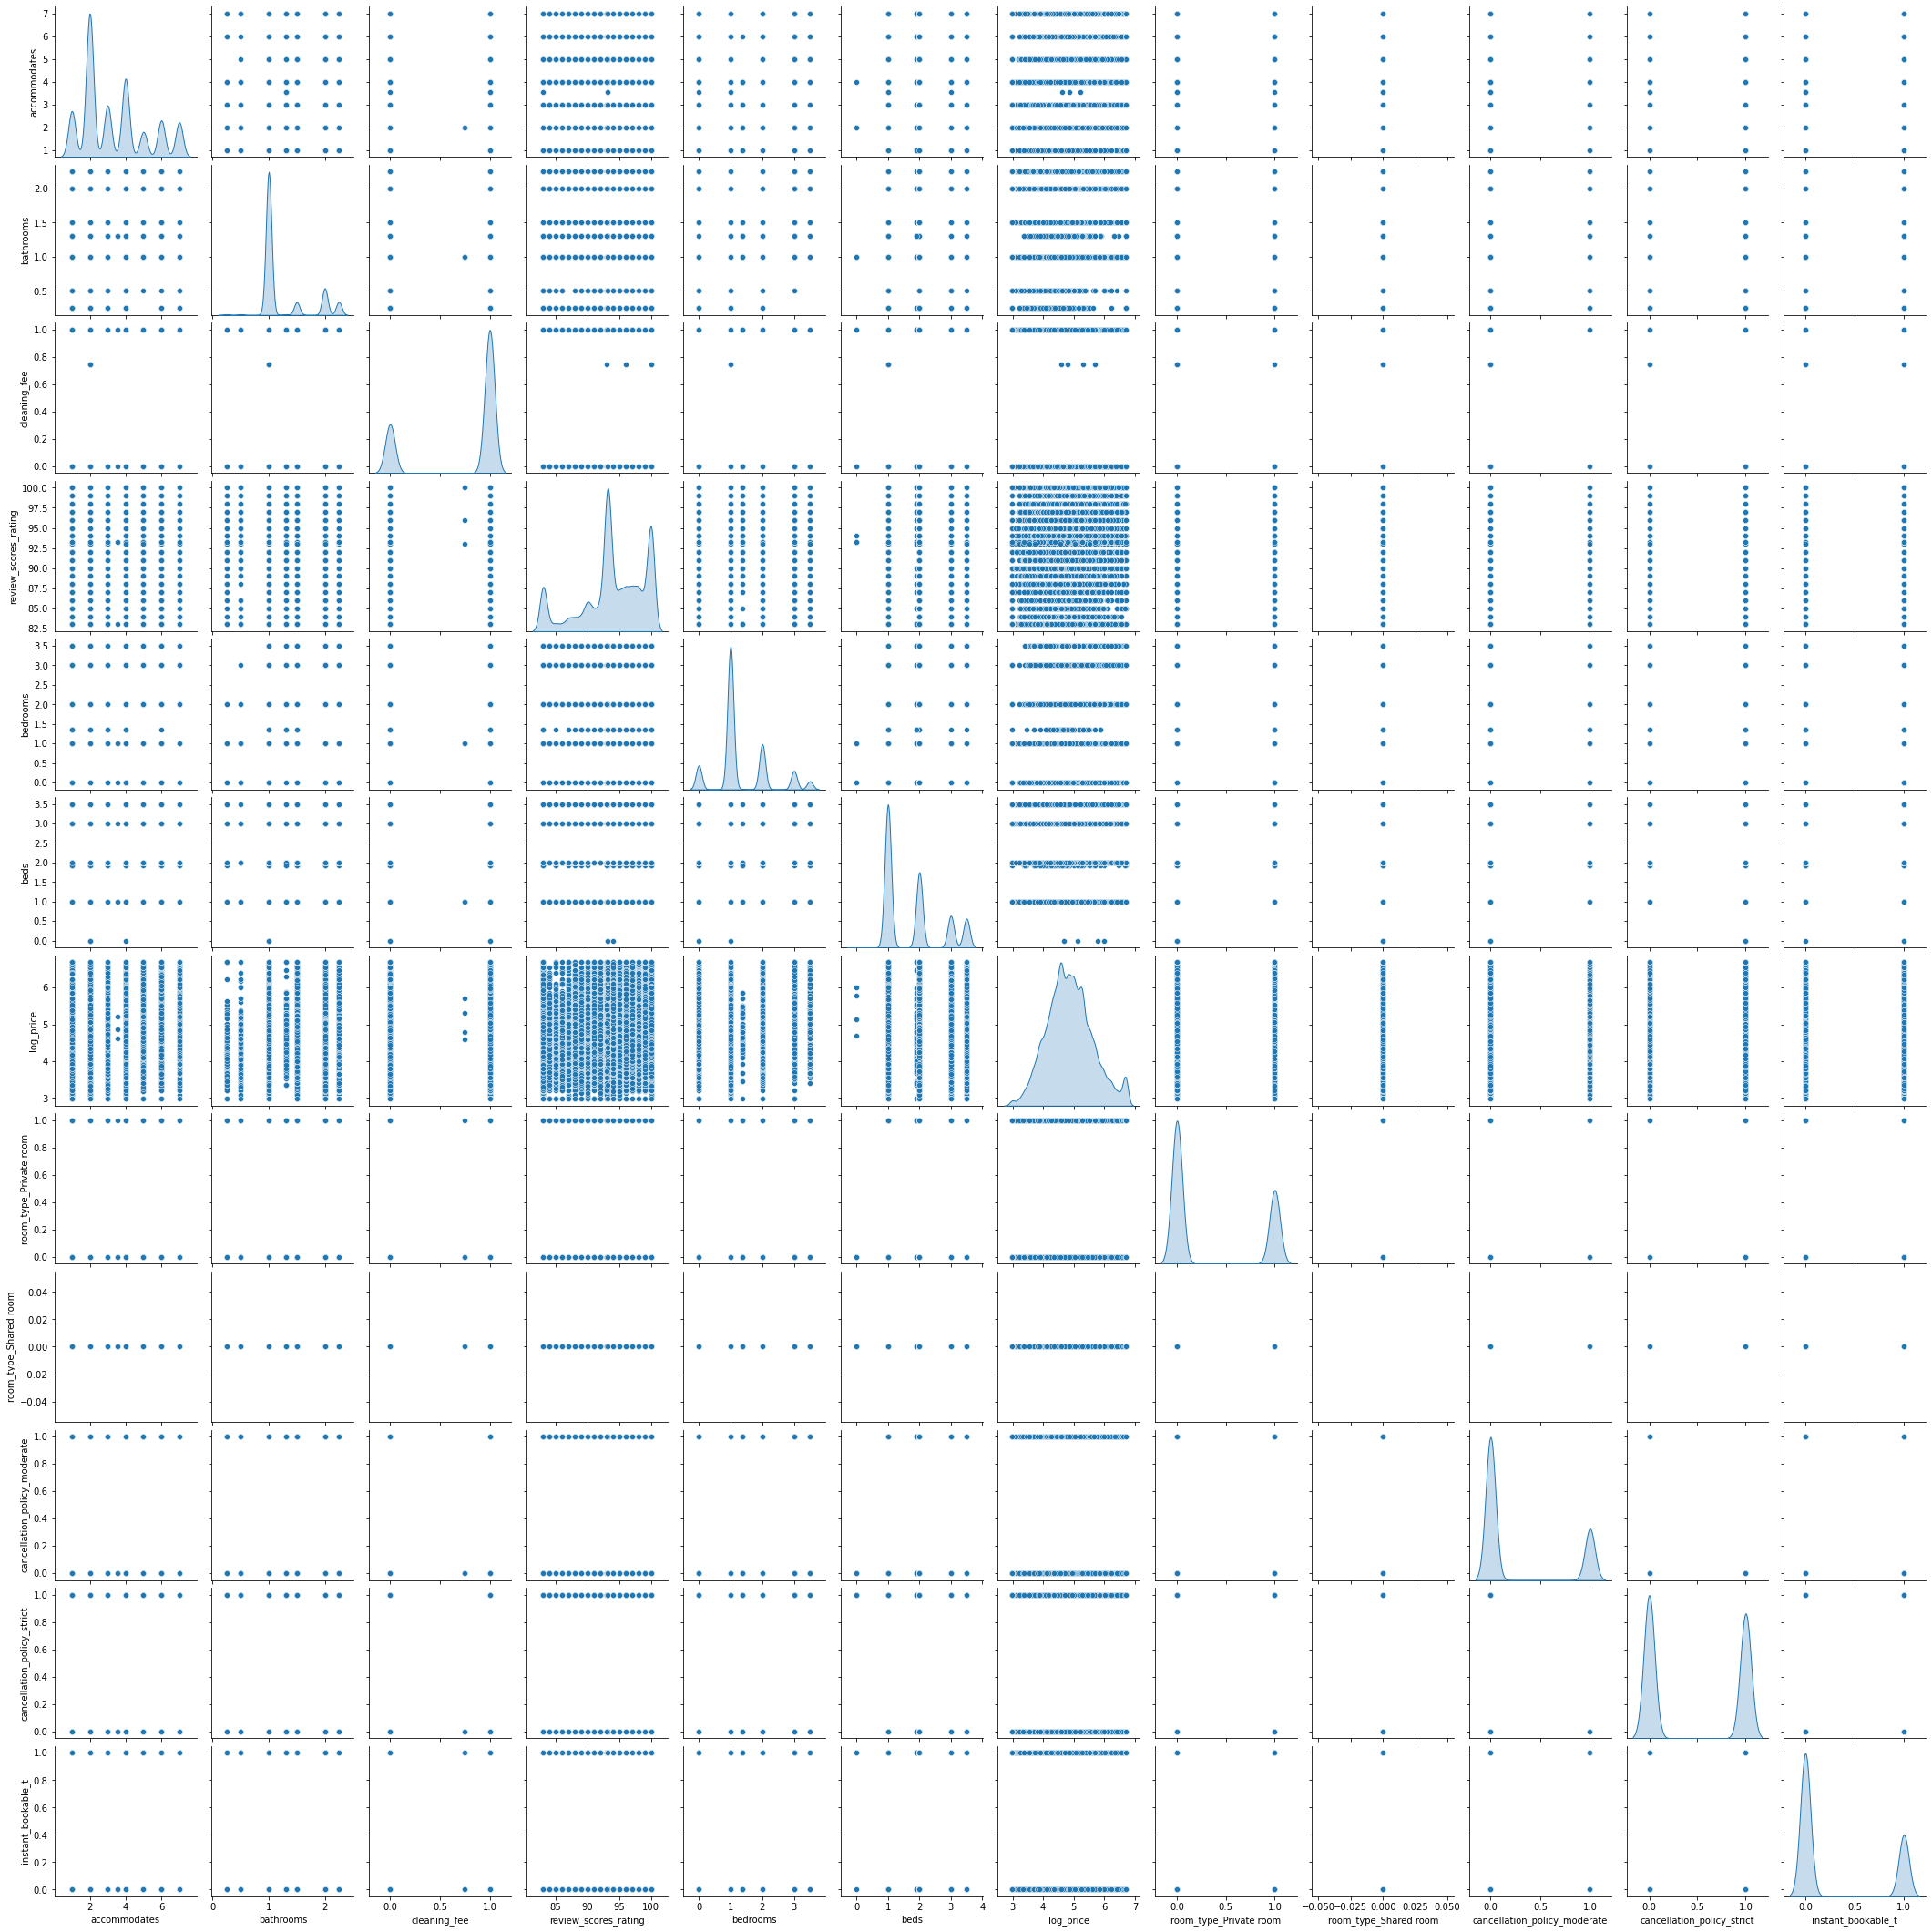

In [135]:
sns.pairplot(df_mean_out, diag_kind = 'kde')
plt.show()

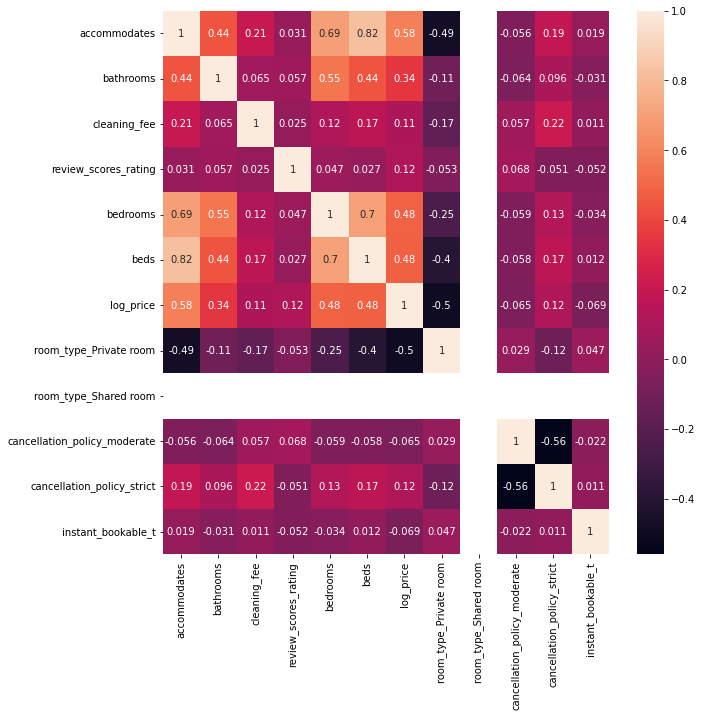

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean_out.corr(),annot= True)
plt.show()

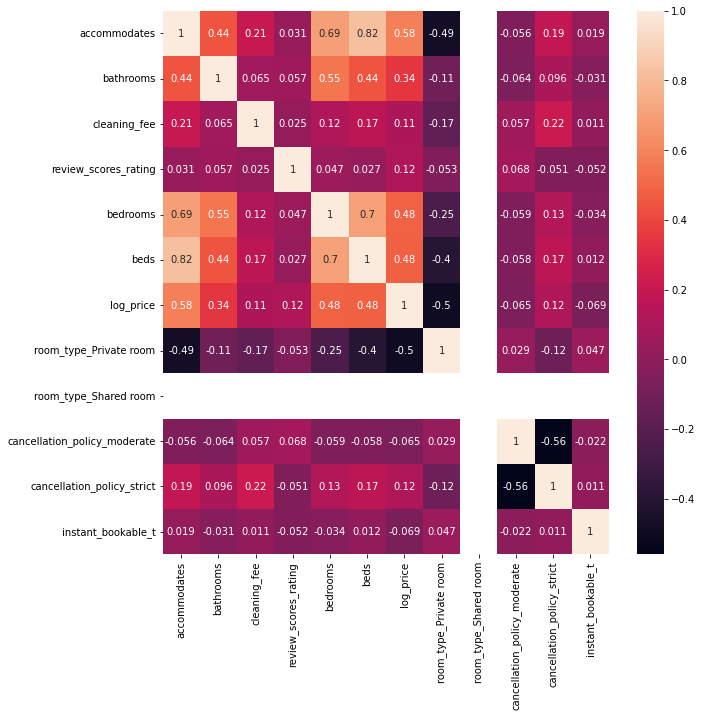

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(df_med_out.corr(),annot= True)
plt.show()

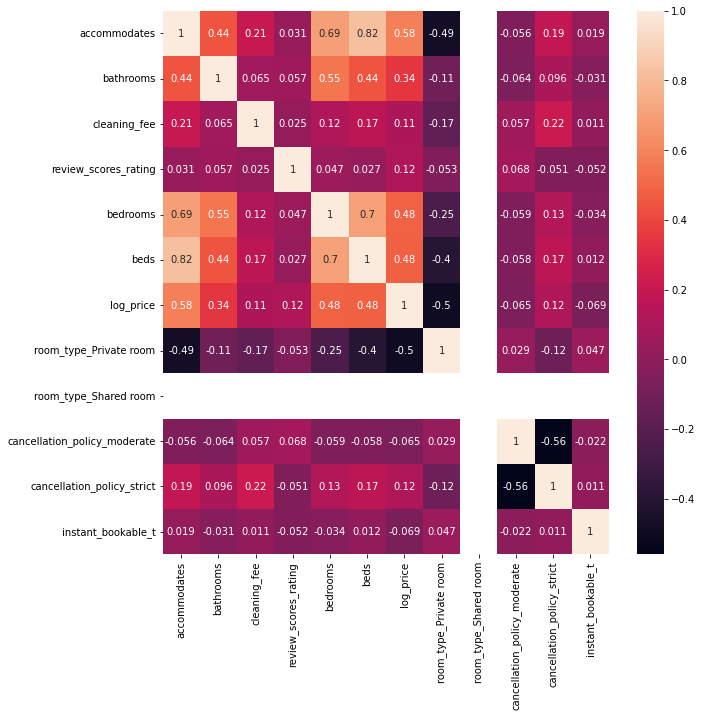

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(df_knn_out.corr(),annot= True)
plt.show()

# Train-Test-Split

In [142]:
X = df_mean_out.drop('log_price', axis = 1)

#copy target into y data frame
Y = df_mean_out[['log_price']]

In [143]:
X.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,83.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [144]:
Y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

# Linear Regresion Model

In [146]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression()

In [147]:
regression_model.score(X_train, Y_train)

0.4453405404485786

# Mean - Outlier not treated

In [148]:
X = df_mean.drop('log_price', axis = 1)

Y = df_mean[['log_price']]

In [149]:
X.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,0,0,0,1,0
1,7.0,1.0,1.0,93.000000,3.0,3.0,0,0,0,1,1
2,5.0,1.0,1.0,92.000000,1.0,3.0,0,0,1,0,1
3,4.0,1.0,1.0,93.202041,2.0,2.0,0,0,0,0,0
4,2.0,1.0,1.0,40.000000,0.0,1.0,0,0,1,0,1


In [150]:
Y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [152]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [153]:
regression_model.score(X_train, Y_train)

0.5026453886994027

# Med- Outlier Treated

In [154]:
X = df_med_out.drop('log_price', axis =1)

Y = df_med_out[['log_price']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

regression_model.fit(X_train,Y_train)
regression_model.score(X_train,Y_train)

0.4453405404485786

In [155]:
X = df_med.drop('log_price', axis =1)

Y = df_med[['log_price']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

regression_model.fit(X_train,Y_train)
regression_model.score(X_train,Y_train)

0.5026453886994027

In [156]:
X = df_knn_out.drop('log_price', axis = 1)

Y = df_knn_out[['log_price']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

regression_model.fit(X_train,Y_train)

regression_model.score(X_train, Y_train)

0.4453405404485786

In [159]:
X = df_knn.drop('log_price', axis = 1)

Y = df_knn[['log_price']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

regression_model.fit(X_train,Y_train)

regression_model.score(X_train, Y_train)

0.5026453886994027

In [160]:
data_train = pd.concat([X_train, Y_train], axis = 1)
data_test = pd.concat([X_test, Y_test], axis = 1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,93.202041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [161]:
data_test.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
33694,4.0,2.0,1.0,100.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,5.402677
8930,3.0,1.0,1.0,88.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.867534
26368,1.0,1.0,1.0,100.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.174387
32595,3.0,1.0,1.0,54.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,4.779123
14713,3.0,1.0,0.0,100.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.787492


In [163]:
data_train.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'instant_bookable_t', 'log_price'],
      dtype='object')

In [181]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.07462894458497113
The coefficient for bathrooms is 0.1561941094434085
The coefficient for cleaning_fee is -0.09039740449046185
The coefficient for review_scores_rating is 0.006028806002825982
The coefficient for bedrooms is 0.1546165671923298
The coefficient for beds is -0.05025112925265768
The coefficient for room_type_Private room is -0.6490567711083761
The coefficient for room_type_Shared room is -1.1023194166369061
The coefficient for cancellation_policy_moderate is -0.06647819487045342
The coefficient for cancellation_policy_strict is -0.014290927638931585
The coefficient for instant_bookable_t is -0.05792549616273623


In [182]:
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

The intercept for the model is 4.089034242391618
